In [45]:
#关于文档的一个数据分类
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
import pylab as pl   #画图用
from sklearn import svm
from sklearn import linear_model
import matplotlib as mpl

In [73]:
dfzipf = pd.read_excel('E:/vcdata/pic/picSC/zipfClass11.xlsx')
dfNH = pd.read_excel('E:/vcdata/pic/picSC/betaK.xlsx')#####记录按照质心拟合和城市标度律
dfzipfO = pd.read_excel('E:/vcdata/pic/picSC/zipflogorigalClass2.xlsx')

Index(['nhA', 'nhT', 'nhG'], dtype='object')

In [75]:
zipfAmount = dfzipf['zipfAmount']
zipfTimes = dfzipf['zipfTimes']
zipfGMP = dfzipf['zipfGMP']
zipfAmountOR = dfzipfO['nhA']
zipfTimesOR = dfzipfO['nhT']
zipfGMPOR = dfzipfO['nhG']
belt_A = dfNH['belt_A']
belt_T = dfNH['belt_T']
belt_G = dfNH['belt_G']
ALL_A = dfNH['ALL_A']
ALL_T = dfNH['ALL_T']
ALL_G = dfNH['ALL_G']

In [79]:
DzipfAmount = [zipfAmount[i+1]-zipfAmount[i] for i in range(len(zipfAmount)-1)]
DzipfTimes = [zipfTimes[i+1]-zipfTimes[i] for i in range(len(zipfTimes)-1)]
DzipfGMP = [zipfGMP[i+1]-zipfGMP[i] for i in range(len(zipfGMP)-1)]
DzipfAmount0 = [1/zipfAmountOR[i]-1/zipfAmountOR[i+1] for i in range(len(zipfAmount)-1)]
DzipfTimes0 = [1/zipfTimesOR[i]-1/zipfTimesOR[i+1] for i in range(len(zipfTimes)-1)]
DzipfGMP0 = [1/zipfGMPOR[i]-1/zipfGMPOR[i+1] for i in range(len(zipfGMP)-1)]

Dbelt_A = [belt_A[i+1]-belt_A[i] for i in range(len(belt_A)-1)]
Dbelt_T = [belt_T[i+1]-belt_T[i] for i in range(len(belt_T)-1)]
Dbelt_G = [belt_G[i+1]-belt_G[i] for i in range(len(belt_G)-1)]
DALL_A = [ALL_A[i+1]-ALL_A[i] for i in range(len(ALL_A)-1)]
DALL_T = [ALL_T[i+1]-ALL_T[i] for i in range(len(ALL_T)-1)]
DALL_G = [ALL_G[i+1]-ALL_G[i] for i in range(len(ALL_G)-1)]

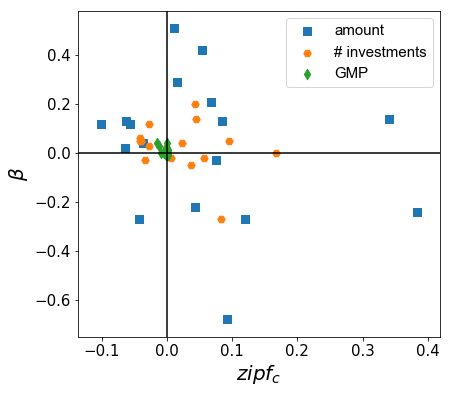

In [80]:
### 正确的 查看所有城市相邻两年标度率的变化 和 所有城市相邻两年的均值之差得到的标度率 
year=np.arange(2000,2017)
plt.figure(figsize=(6.5,6))
plt.scatter(DzipfAmount,DALL_A,label='amount',marker='s',s=55)
plt.scatter(DzipfTimes,DALL_T,label='# investments',marker='H',s=55)
plt.scatter(DzipfGMP,DALL_G,label='GMP',marker='d',s=55)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 20,
    }
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 15,
    }
plt.tick_params(labelsize=15) #刻度字体大小13
plt.xlabel('$zipf_c$',font2)
plt.ylabel('$β$',font2)
plt.legend(prop=font1)
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')
# plt.plot([0,1,2],[0,1,2],color='black',linestyle='--')
# plt.savefig('E:/vcdata/pic/picSC/Fig4_d.pdf', bbox_inches='tight')#保存图片

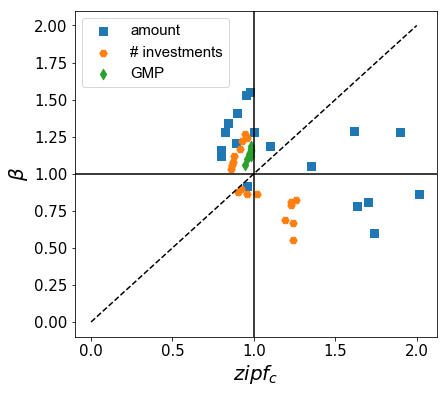

In [57]:
### 正确的 查看所有城市相邻两年标度率的变化 和 所有城市相邻两年的均值之差得到的标度率 
year=np.arange(2000,2017)
plt.figure(figsize=(6.5,6))
plt.scatter(-zipfAmountOR/1,ALL_A,label='amount',marker='s',s=55)
plt.scatter(-zipfTimesOR/1,ALL_T,label='# investments',marker='H',s=55)
plt.scatter(-zipfGMPOR/1,ALL_G,label='GMP',marker='d',s=55)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 20,
    }
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 15,
    }
plt.tick_params(labelsize=15) #刻度字体大小13
plt.xlabel('$zipf_c$',font2)
plt.ylabel('$β$',font2)
plt.legend(prop=font1)
plt.axhline(y=1, color='black', linestyle='-')
plt.axvline(x=1, color='black', linestyle='-')
plt.plot([0,1,2],[0,1,2],color='black',linestyle='--')
# plt.savefig('E:/vcdata/pic/picSC/Fig4_d.pdf', bbox_inches='tight')#保存图片

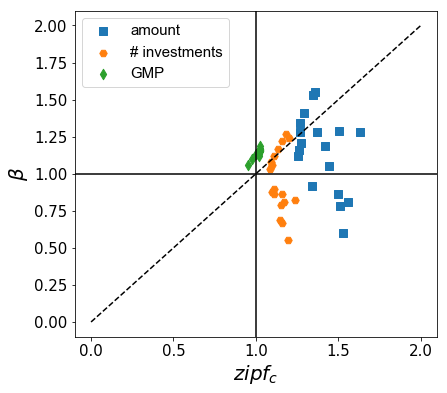

In [58]:
### 正确的 查看所有城市相邻两年标度率的变化 和 所有城市相邻两年的均值之差得到的标度率 
year=np.arange(2000,2017)
plt.figure(figsize=(6.5,6))
plt.scatter(-zipfAmount/1,ALL_A,label='amount',marker='s',s=55)
plt.scatter(-zipfTimes/1,ALL_T,label='# investments',marker='H',s=55)
plt.scatter(-zipfGMP/1,ALL_G,label='GMP',marker='d',s=55)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 20,
    }
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 15,
    }
plt.tick_params(labelsize=15) #刻度字体大小13
plt.xlabel('$zipf_c$',font2)
plt.ylabel('$β$',font2)
plt.legend(prop=font1)
plt.axhline(y=1, color='black', linestyle='-')
plt.axvline(x=1, color='black', linestyle='-')
plt.plot([0,1,2],[0,1,2],color='black',linestyle='--')
# plt.savefig('E:/vcdata/pic/picSC/Fig4_d.pdf', bbox_inches='tight')#保存图片

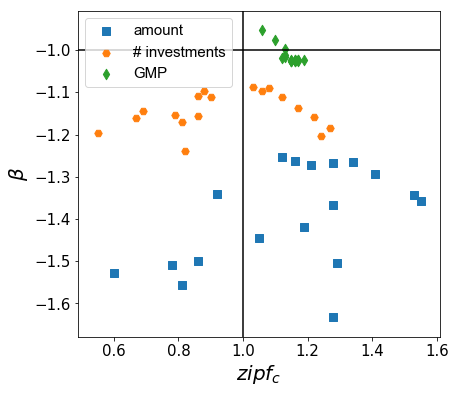

In [72]:
### 正确的 查看所有城市相邻两年标度率的变化 和 所有城市相邻两年的均值之差得到的标度率 
year=np.arange(2000,2017)
plt.figure(figsize=(6.5,6))
plt.scatter(ALL_A,zipfAmount,label='amount',marker='s',s=55)
plt.scatter(ALL_T,zipfTimes,label='# investments',marker='H',s=55)
plt.scatter(ALL_G,zipfGMP,label='GMP',marker='d',s=55)
# plt.plot(ALL_A,zipfAmount,label='amount')
# plt.plot(ALL_T,zipfTimes,label='# investments')
# plt.plot(ALL_G,zipfGMP,label='GMP')
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 20,
    }
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 15,
    }
plt.tick_params(labelsize=15) #刻度字体大小13
plt.xlabel('$zipf_c$',font2)
plt.ylabel('$β$',font2)
plt.legend(prop=font1)
plt.axhline(y=-1, color='black', linestyle='-')
plt.axvline(x=1, color='black', linestyle='-')
# plt.plot([1,2],[-1,2],color='black',linestyle='--')
# plt.plot([0,1,2],[0,1,2],color='black',linestyle='--')
# plt.savefig('E:/vcdata/pic/picSC/Fig4_d.pdf', bbox_inches='tight')#保存图片